In [59]:
# This allows us to manually edit the code and have it reflected in this notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
# import everything we need

import json # to prettyprint ordereddict

import numpy as np
import pandas as pd # using pd.__version__ == 0.24.2, There are newer versions and things might break!!!

print('pd.__version__:', pd.__version__)

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display, clear_output
import ipywidgets

from samiPostAnalysis import samiPostAnalysis

pd.__version__: 1.0.3


### Create a samiPostAnalysis object with all of our sekelton analysis across groups (wtf, wtm, kof, kom)

This assumes eveything has been processed with samiAnalysis.py

In particular

```
wtfPath = '../analysis/wt-female_results.csv'
kofPath = '../analysis/ko-female_results.csv'
wtmPath = '../analysis/wt-male_results.csv'
komPath = '../analysis/ko-male_results.csv'
```

In [61]:
spa = samiPostAnalysis()

samiPostAnalysis() is loading analysis files
    loading: ../analysis/wt-female_results.csv
    loading: ../analysis/ko-female_results.csv
    loading: ../analysis/wt-male_results.csv
    loading: ../analysis/ko-male_results.csv


### Run density analysis

This assumes everything has been processed by samiVolume2.py

In [62]:
pruneDict = spa.getDefaultPruneDict()
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]

df = spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
#spa.densityPlot(pruneDict, 'dErodedToRing') # pass in one of (dFullMask  dErodedMask  dRingMask  dRingVsErodedRatio)
#spa.densityPlot(pruneDict, 'dRingToEroded') # pass in one of (dFullMask  dErodedMask  dRingMask  dRingVsErodedRatio)

display(df.head())
display(df.tail())


,genotype,sex,myCellNumber,branchType,statName,minValue,xVoxel,yVoxel,zVoxel,voxelVolume,...,vErodedMask,vRingMask,lenInFullMask,lenInErodedMask,lenInRingMask,dFullMask,dErodedMask,dRingMask,dRingToEroded,dErodedToRing
0,wt,female,0,[2],len3d,1,0.209253,0.209253,0.43,0.018828,...,958.322025,2587.175747,784.731123,373.688736,216.899144,0.221332,0.389941,0.083836,0.214997,4.651217
1,wt,female,1,[2],len3d,1,0.089874,0.089874,0.43,0.003473,...,472.865596,1263.546304,634.272964,122.508089,302.549339,0.365278,0.259076,0.239445,0.924226,1.081987
2,wt,female,2,[2],len3d,1,0.089874,0.089874,0.43,0.003473,...,0.000000,1204.188029,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
3,wt,female,3,[2],len3d,1,0.199193,0.199193,0.43,0.017061,...,531.684180,2044.773790,427.292316,224.514072,92.490045,0.165845,0.422270,0.045232,0.107117,9.335554
4,wt,female,4,[2],len3d,1,0.230178,0.230178,0.43,0.022782,...,1733.294114,2828.594926,785.744449,641.365407,63.453031,0.172241,0.370027,0.022433,0.060625,16.494975


,genotype,sex,myCellNumber,branchType,statName,minValue,xVoxel,yVoxel,zVoxel,voxelVolume,...,vErodedMask,vRingMask,lenInFullMask,lenInErodedMask,lenInRingMask,dFullMask,dErodedMask,dRingMask,dRingToEroded,dErodedToRing
130,ko,male,39,[2],len3d,1,0.180139,0.180139,0.43,0.013954,...,1071.634520,2337.098144,1044.033308,558.494841,156.898370,0.306282,0.521162,0.067134,0.128816,7.763025
131,ko,male,40,[2],len3d,1,0.218063,0.218063,0.43,0.020447,...,1478.005522,2586.857265,939.498031,843.014323,29.986508,0.231127,0.570373,0.011592,0.020323,49.204573
132,ko,male,41,[2],len3d,1,0.165728,0.165728,0.43,0.011810,...,674.096843,2029.175937,1056.785089,308.728163,430.301981,0.390928,0.457988,0.212058,0.463020,2.159734
133,ko,male,42,[2],len3d,1,0.207160,0.207160,0.43,0.018454,...,774.146985,2024.839742,656.466268,387.817707,99.302672,0.234537,0.500961,0.049042,0.097896,10.214896
134,ko,male,43,[2],len3d,1,0.089874,0.089874,0.43,0.003473,...,723.142869,1242.682339,1027.507607,296.385004,446.187014,0.522685,0.409857,0.359052,0.876042,1.141498


## Run analysis twice and make two plots

Temporary conclusion is the central/eroded region has higher density than the outer

There is a problem here, my outer mask is going beyond the actual cell boundary. I need to run this multiple times (constructing different mask each time) by setting the threshold distance into euclidean-distrance transform to make outer masks bother farther and close to the actual bounary of the cell.

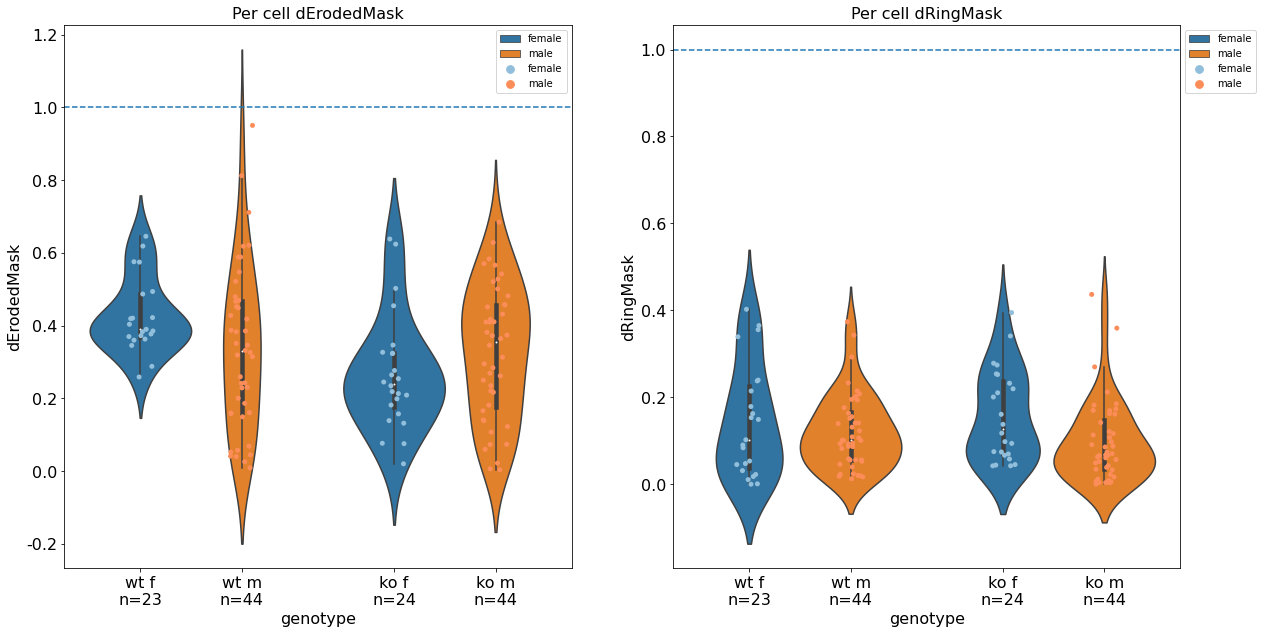

In [25]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(20,10))
axs = np.ravel(axs) # flatten into 1D

#
# 1
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]

spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)

ax = axs[0]
# pruneDict is ONLY used to generate x-axis labels
# pass in one of (dFullMask  dErodedMask  dRingMask  dRingToEroded, dErodedToRing)
spa.densityPlot(pruneDict, 'dErodedMask', ax=ax)

#
# 2
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]

spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)

ax = axs[1]
# pruneDict is ONLY used to generate x-axis labels
# pass in one of (dFullMask  dErodedMask  dRingMask  dRingToEroded, dErodedToRing)
spa.densityPlot(pruneDict, 'dRingMask', ax=ax)


## Run analysis 4 times with different branch/segment parameters

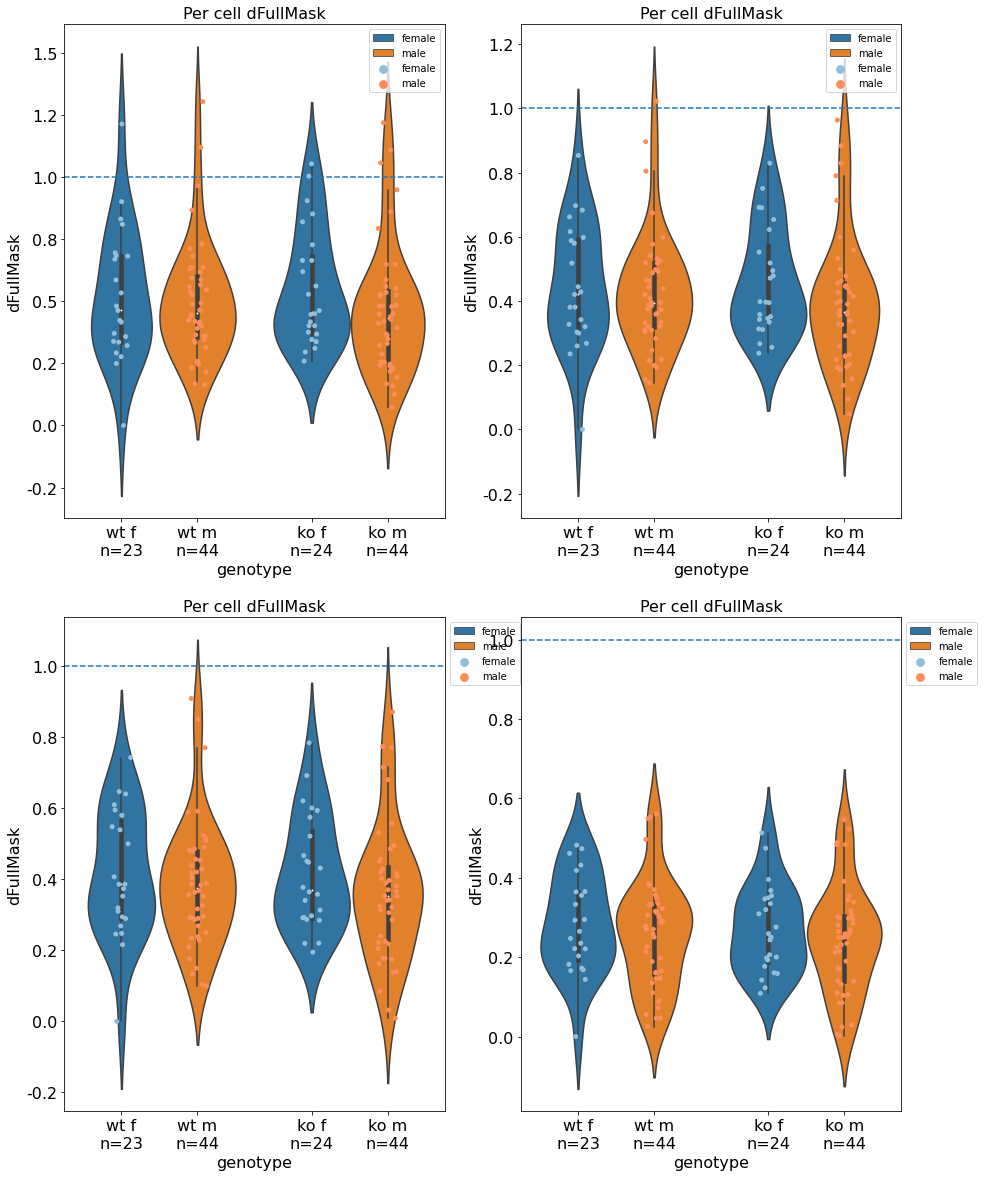

In [51]:
fig, axs = plt.subplots(2, 2, sharey=False, figsize=(15,20))
axs = np.ravel(axs) # flatten into 1D

# chose one of these
myStat = 'dErodedMask'
#myStat = 'dRingMask'
#myStat = 'dRingToEroded'
#myStat = 'dErodedToRing'
myStat = 'vErodedMask'
myStat = 'vRingMask'
myStat = 'dFullMask'

#
# 1
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 0
pruneDict['branchType'] = []
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
ax = axs[0]
spa.densityPlot(pruneDict, myStat, ax=ax)

#
# 2
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = []
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
ax = axs[1]
spa.densityPlot(pruneDict, myStat, ax=ax)

#
# 3
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [1,2]
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
ax = axs[2]
spa.densityPlot(pruneDict, myStat, ax=ax)

#
# 4
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
ax = axs[3]
spa.densityPlot(pruneDict, myStat, ax=ax)



In [52]:
# chose one of these
myStat = 'dErodedMask'
#myStat = 'dRingMask'
#myStat = 'dRingToEroded'
#myStat = 'dErodedToRing'
myStat = 'vErodedMask'
myStat = 'dFullMask'

#
# 1
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 0
pruneDict['branchType'] = []
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', myStat, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

#
# 2
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = []
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', myStat, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

#
# 3
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [1,2]
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', myStat, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

#
# 3
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', myStat, pruneDict['minValue'], pruneDict['branchType'])
display(df1)


statName: dFullMask 0 []


/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.989956,0.0591995,0.00109565,0.102214
1,"(wt, male)",,0.99667,0.407818,0.943449
2,"(ko, female)",,,0.991769,0.319945
3,"(ko, male)",,,,0.996670


statName: dFullMask 1 []


/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.989956,0.108239,0.000403556,0.189662
1,"(wt, male)",,0.99667,0.256067,0.923543
2,"(ko, female)",,,0.991769,0.179899
3,"(ko, male)",,,,0.996670


statName: dFullMask 1 [1, 2]


/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.989956,0.0671604,0.000339347,0.146542
1,"(wt, male)",,0.99667,0.250734,0.943449
2,"(ko, female)",,,0.991769,0.184101
3,"(ko, male)",,,,0.996670


statName: dFullMask 1 [2]


/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.989956,0.0471554,0.000126329,0.048738
1,"(wt, male)",,0.99667,0.240301,0.996671
2,"(ko, female)",,,0.991769,0.167720
3,"(ko, male)",,,,0.996670


## For different sets of parameters compare dRing and/or dEroded within each (genotype, sex)

In [33]:
pruneDict = spa.getDefaultPruneDict()

#
# 1
statName = 'dRingMask'

pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
spa.densityCalculateAll(pruneDict) # when we change detection parameters, we need this again (slow)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', statName, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

pruneDict['minValue'] = 1
pruneDict['branchType'] = [1,2]
spa.densityCalculateAll(pruneDict) # when we change detection parameters, we need this again (slow)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', statName, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

#
# 2
statName = 'dErodedMask'

pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
spa.densityCalculateAll(pruneDict) # when we change detection parameters, we need this again (slow)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', statName, pruneDict['minValue'], pruneDict['branchType'])
display(df1)

pruneDict['minValue'] = 1
pruneDict['branchType'] = [1,2]
spa.densityCalculateAll(pruneDict) # when we change detection parameters, we need this again (slow)
df1, df2 = spa.densityGetPairwiseGroupComparison(pruneDict, statName)
print('statName:', statName, pruneDict['minValue'], pruneDict['branchType'])
display(df1)



statName: dRingMask 1 [2]


/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.99123,0.900168,0.437294,0.261669
1,"(wt, male)",,0.99667,0.192723,0.083335
2,"(ko, female)",,,0.991769,0.011678
3,"(ko, male)",,,,0.996670


statName: dRingMask 1 [1, 2]


/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.99123,0.942102,0.412596,0.167603
1,"(wt, male)",,0.99667,0.148814,0.068235
2,"(ko, female)",,,0.991769,0.009013
3,"(ko, male)",,,,0.996670


statName: dErodedMask 1 [2]


/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.989956,0.0471554,0.000126329,0.048738
1,"(wt, male)",,0.99667,0.240301,0.996671
2,"(ko, female)",,,0.991769,0.167720
3,"(ko, male)",,,,0.996670


statName: dErodedMask 1 [1, 2]


/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cudmore/anaconda3/envs/segmentation/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.989956,0.0671604,0.000339347,0.146542
1,"(wt, male)",,0.99667,0.250734,0.943449
2,"(ko, female)",,,0.991769,0.184101
3,"(ko, male)",,,,0.996670


## get stat tests on plot

see: https://github.com/webermarcolivier/statannot

pip install statannot

In [63]:
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")

### rerun full density analysis

In [98]:
pruneDict = spa.getDefaultPruneDict()
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
df = spa.densityCalculateAll(pruneDict) # uses (statName, minValue, branchType)


In [99]:
# assuming we ran density analysis all
df = spa.dfDensityAnalysis

display(df.head())

,genotype,sex,myCellNumber,branchType,statName,minValue,xVoxel,yVoxel,zVoxel,voxelVolume,...,vErodedMask,vRingMask,lenInFullMask,lenInErodedMask,lenInRingMask,dFullMask,dErodedMask,dRingMask,dRingToEroded,dErodedToRing
0,wt,female,0,[2],len3d,1,0.209253,0.209253,0.43,0.018828,...,958.322025,2587.175747,784.731123,373.688736,216.899144,0.221332,0.389941,0.083836,0.214997,4.651217
1,wt,female,1,[2],len3d,1,0.089874,0.089874,0.43,0.003473,...,472.865596,1263.546304,634.272964,122.508089,302.549339,0.365278,0.259076,0.239445,0.924226,1.081987
2,wt,female,2,[2],len3d,1,0.089874,0.089874,0.43,0.003473,...,0.000000,1204.188029,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
3,wt,female,3,[2],len3d,1,0.199193,0.199193,0.43,0.017061,...,531.684180,2044.773790,427.292316,224.514072,92.490045,0.165845,0.422270,0.045232,0.107117,9.335554
4,wt,female,4,[2],len3d,1,0.230178,0.230178,0.43,0.022782,...,1733.294114,2828.594926,785.744449,641.365407,63.453031,0.172241,0.370027,0.022433,0.060625,16.494975


        Statistical test to run. Must be one of:
        - `Levene`
        - `Mann-Whitney`
        - `Mann-Whitney-gt`
        - `Mann-Whitney-ls`
        - `t-test_ind`
        - `t-test_welch`
        - `t-test_paired`
        - `Wilcoxon` (requires same number of observations)
        - `Kruskal`


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ko_female v.s. ko_male: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.299e+00
wt_female v.s. wt_male: t-test independent samples with Bonferroni correction, P_val=5.093e-01 stat=1.751e+00
wt_male v.s. ko_female: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.339e+00
wt_male v.s. ko_male: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=2.587e-01
wt_female v.s. ko_female: t-test independent samples with Bonferroni correction, P_val=1.940e-03 stat=3.909e+00
wt_female v.s. ko_male: t-test independent samples with Bonferroni correction, P_val=1.323e-01 stat=2.347e+00


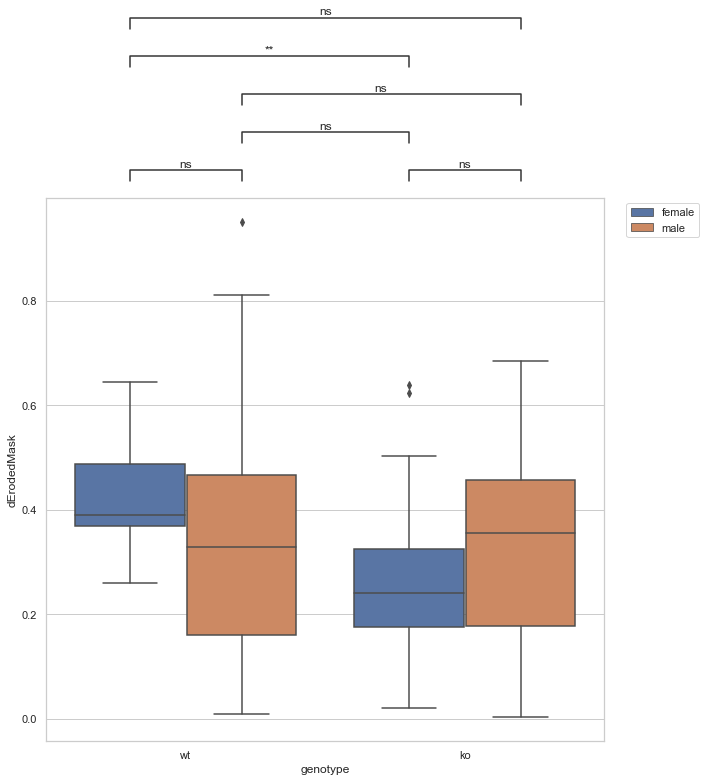

In [105]:
myStat = 'dErodedMask'
#myStat = 'dRingMask'
#myStat = 'dErodedToRing'
#myStat = 'dRingToEroded'

myStatTest = 't-test_ind' # ('Kruskal', 'Mann-Whitney', 'Mann-Whitney-gt', 't-test_ind')
text_format = 'star' #'simple'

fig, axs = plt.subplots(1, 1, sharey=False, figsize=(10,10))
axs = np.ravel(axs) # flatten into 1D

#x = "color"
x = 'genotype'
#y = "price"
y = myStat
#hue = "cut"
hue = 'sex'
#hue_order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
hue_order=['female', 'male']
'''
box_pairs=[
    (("E", "Ideal"), ("E", "Very Good")),
    (("E", "Ideal"), ("E", "Premium")),
    (("E", "Ideal"), ("E", "Good")),
    (("I", "Ideal"), ("I", "Premium")),
    (("I", "Ideal"), ("I", "Good")),
    (("J", "Ideal"), ("J", "Premium")),
    (("J", "Ideal"), ("J", "Good")),
    (("E", "Good"), ("I", "Ideal")),
    (("I", "Premium"), ("J", "Ideal")),
    ]
'''
box_pairs=[
    (("ko", "female"), ("ko", "male")),
    (("wt", "male"), ("ko", "female")),
    (("wt", "male"), ("ko", "male")),
    (("wt", "female"), ("wt", "male")),
    (("wt", "female"), ("ko", "female")),
    (("wt", "female"), ("ko", "male")),
    ]
ax = sns.boxplot(data=df, x=x, y=y, hue=hue, ax=axs[0])
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test=myStatTest, loc='outside', text_format=text_format, verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
#plt.savefig('example_hue_layout.png', dpi=300, bbox_inches='tight')